In [89]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [90]:
f = fits.open(r"D:\Astro\20220711-M13-OAG-Test\M13-Light\Light_ASIImg_90sec_Bin1_-0.3C_gain120_2022-07-10_232701_frame0001.fit")
img = f[0].data

In [91]:
r_m = np.array([
  [1, 0, 1],
  [0, 0, 0],
  [1, 0, 0]
])
g_m = np.array([
  [0, 1, 0],
  [1, 0, 1],
  [0, 1, 0]
])
b_m = np.array([
  [0, 0, 0],
  [0, 1, 0],
  [0, 0, 0]
])

In [92]:
img.shape

(2822, 4144)

In [93]:
r_m = np.zeros(img.shape, dtype=np.uint16)
g_m = np.zeros(img.shape, dtype=np.uint16)
b_m = np.zeros(img.shape, dtype=np.uint16)

r_m[0::2, 0::2] = 1
g_m[1::2, 0::2] = 1
g_m[0::2, 1::2] = 1
b_m[1::2, 1::2] = 1


In [94]:
g_kernel = np.array([
  [0, 1, 0],
  [1, 4, 1],
  [0, 1, 0],
]) / 4
rb_kernel = np.array([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1],
]) / 4

In [95]:
g_kernel

array([[0.  , 0.25, 0.  ],
       [0.25, 1.  , 0.25],
       [0.  , 0.25, 0.  ]])

In [96]:
rb_kernel

array([[0.25, 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 0.25]])

In [97]:
R = cv2.filter2D(img * r_m, ddepth=cv2.CV_32F, kernel=rb_kernel, anchor=(-1, -1))
G = cv2.filter2D(img * g_m, ddepth=cv2.CV_32F, kernel=g_kernel, anchor=(-1, -1))
B = cv2.filter2D(img * b_m, ddepth=cv2.CV_32F, kernel=rb_kernel, anchor=(-1, -1))

In [98]:
def norm(img):
  img = img - np.min(img)
  img = img / np.max(img)
  return img

True

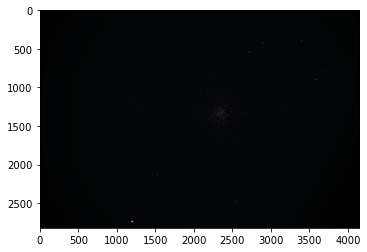

In [99]:
deb_img = np.stack([norm(R), norm(B), norm(G)], axis=2)
plt.imshow(deb_img)
cv2.imwrite(r"C:\Users\anand\Desktop\output-bilinear.tif", deb_img)